<a href="https://colab.research.google.com/github/youngyoonc/EDA/blob/master/World_happiness_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction 
- dataset obtained from [Kaggle](https://www.kaggle.com/unsdsn/world-happiness), modified to contain only data from 2015 - 2017
- ranks 155 countries by their happiness level through different indicators:
  - economic production
  - social support
  - life expectancy 
  - freedom 
  - absence of corruption
  - generosity
  - dystopia residual (the Dystopia Happiness Score of 1.85 + the Residual or unexplained value for each country)
    - low dystopia residual = low level of happiness
    - high dystopia residual = high level of happiness 

### Column information
- Country
- Happiness rank 
- Happiness score = $ Economic (GDP per cap) + Family + Health + Freedom + Trust + Generosity + Dystopia Residual $
 * obtained from a sample of population where the respondent rated their happiness from 1 to 10 
- Economic (GDP per cap): Extend of GDP that contributes to the happiness score
- Family: Extend of family that contributes to the happiness score 
- Health: Extend of health (life expectancy) that contributes to the happiness score 
- Freedom: Extend of freedom that contributes to happiness (represents the freedom of speech, freedom to pursue what we want, etc) 
- Trust (Government corruption): Extend of trust with regards to government corruption that contribute to happiness score 
- Generosity: Extend of generosity that contribute to happiness score 
- dystopia residual
- Year



# Import packages & data 

In [0]:
# Impor packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [0]:
# Import dataset
from google.colab import files 
uploaded = files.upload()
data = pd.read_csv('World_Happiness_2015_2017_.csv')

Saving World_Happiness_2015_2017_.csv to World_Happiness_2015_2017_.csv


## Overview of the data

In [0]:
data.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [0]:
data.shape

(470, 11)

In [0]:
data.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                               int64
dtype: object

### Null/NaN values


In [0]:
data.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

## Visualisation - overview using pairplot 

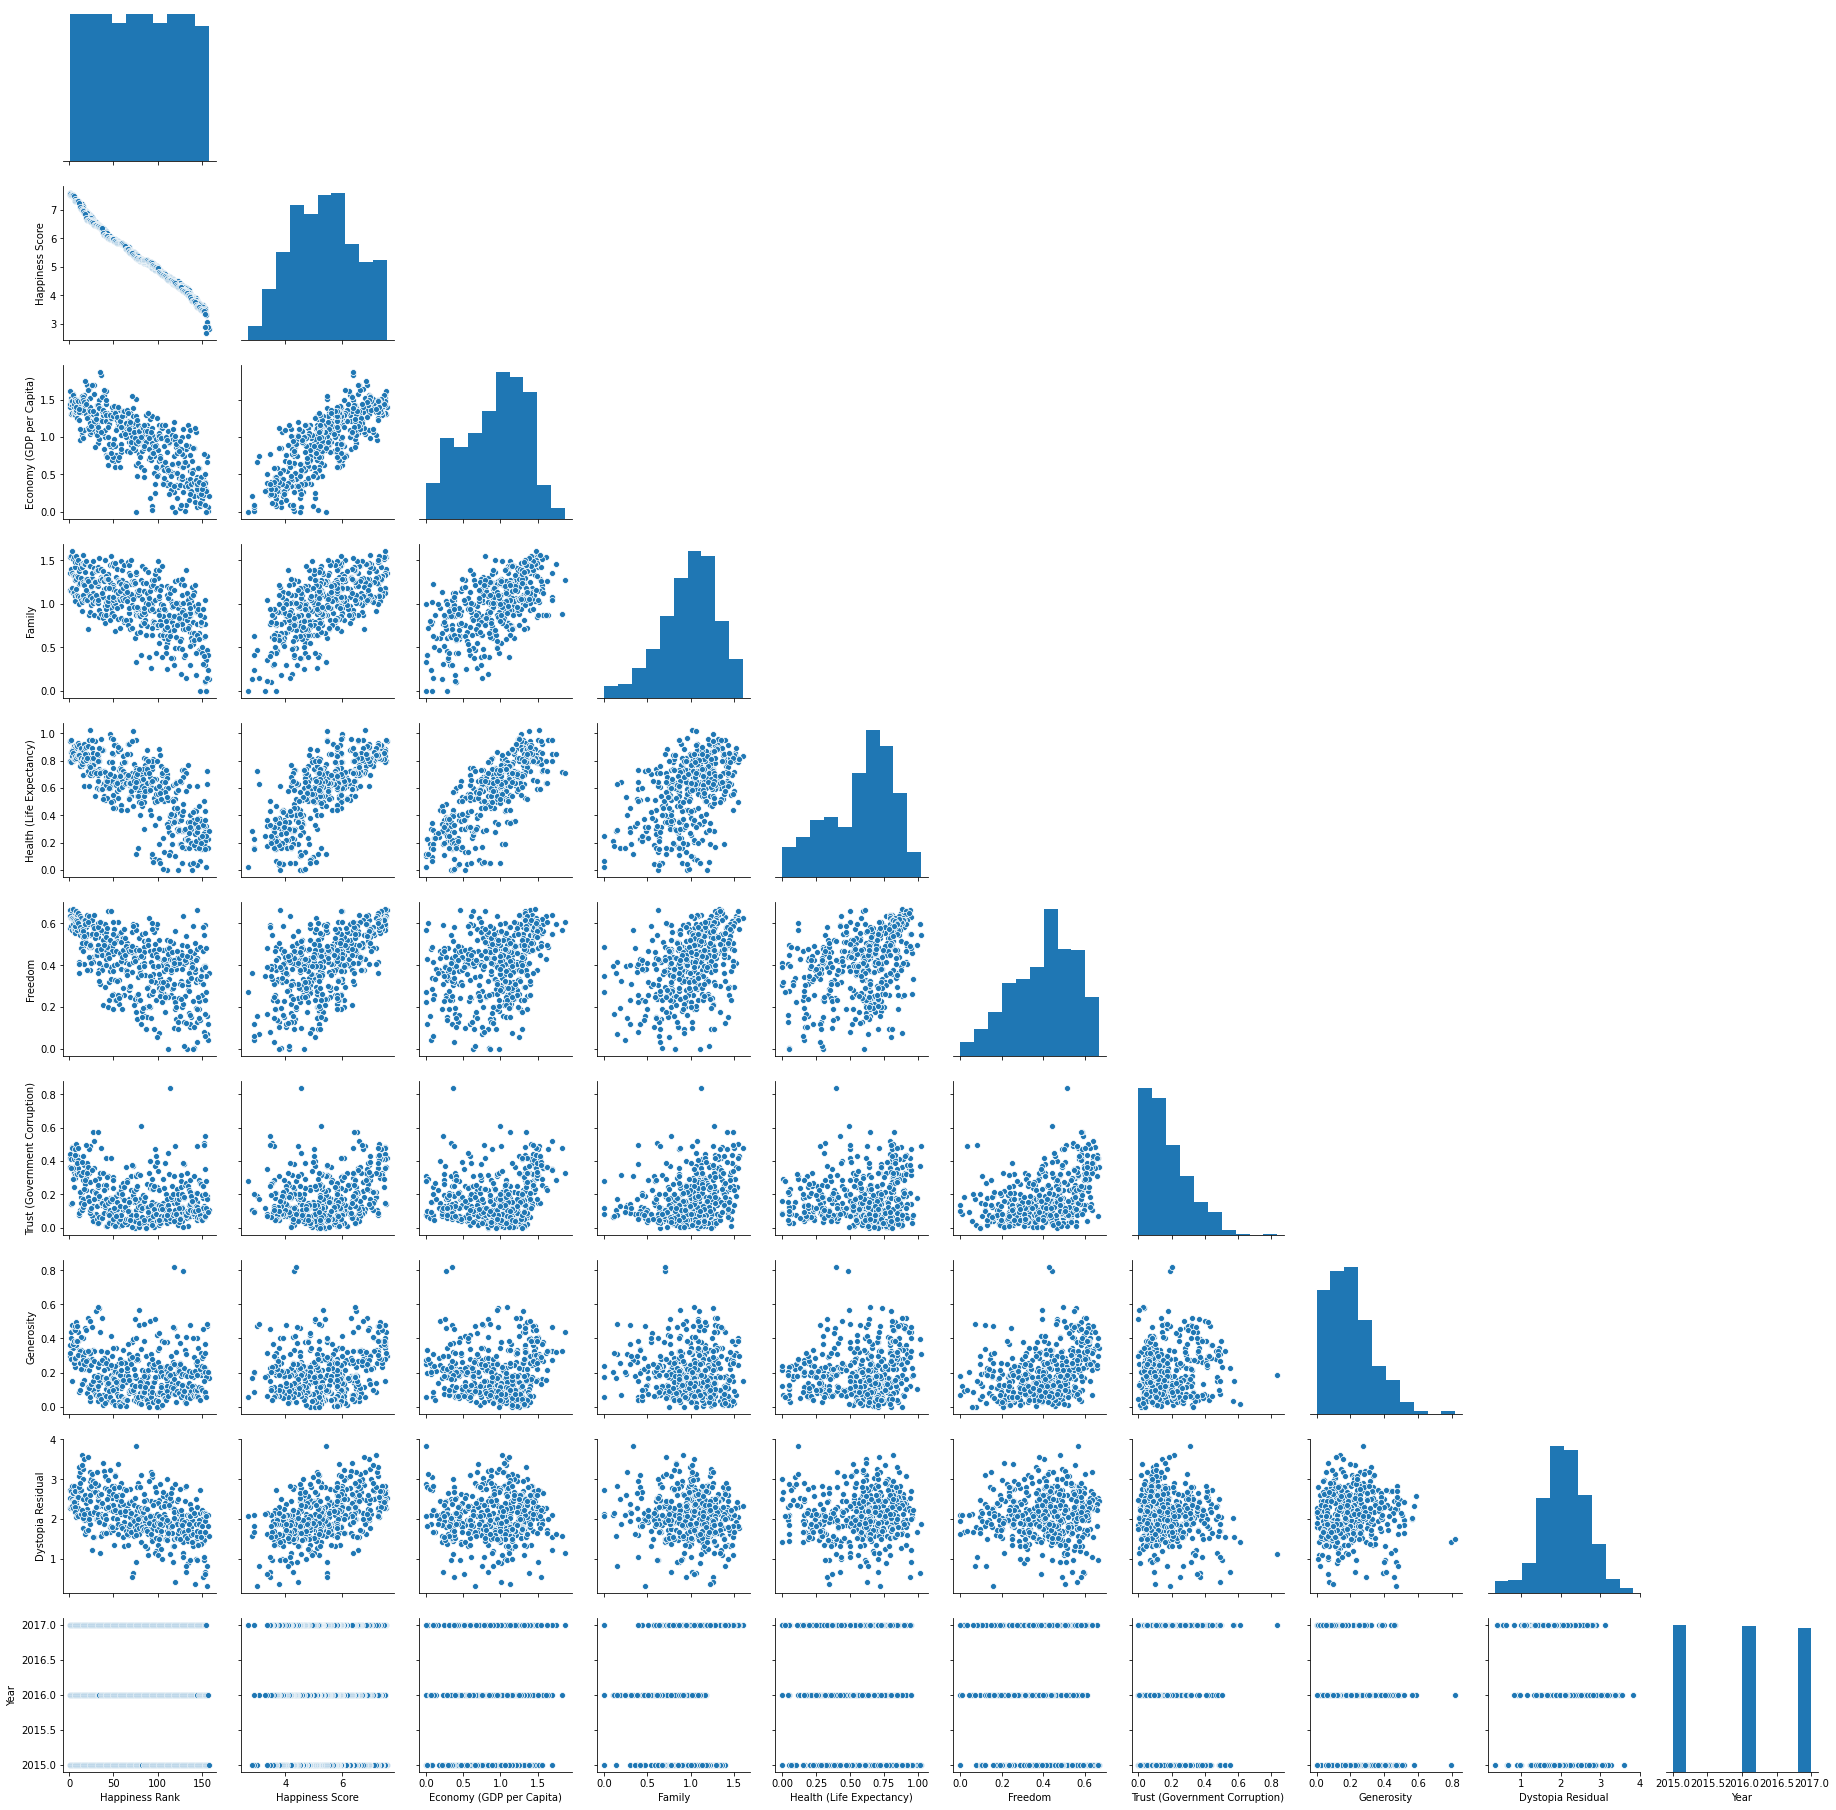

In [0]:
g = sns.pairplot(data, corner=True)

two types of plot
- Histograms (diagonal): shows the distribution of each attribute
- scatter plot: shows the relationship between 2 attributes
  * a strong linear correlation between Happiness Rank and Happiness Score as the rank is determined by the score 
  * positive linear correlation between Happiness Score and Economic, Family, Health (second column from the left) 



## Correlation between Happiness score and the 7 attributes using Pearson distribution
 - Pearson's correlation: a measure of the linear relationship between 2 continuous variables which range from 1 (a perfect positive linear correlation) to -1 (a perfect negative correlation)

#### Assumptions for Pearson
- Each variable needs to be continuous. 
- Related pair, which refers to the pairs of variables. Each observation should have a pair of values.
- No outliers in either variable. Having an outlier can skew the results of the correlation by pulling the line of best fit formed by the correlation too far in one direction or another.  Typically, an outlier is defined as a value that is 3.29 standard deviations from the mean, or a standardized value of less than ±3.29.
- Linearity and homoscedasticity refer to the shape of the values formed by the scatterplot. For linearity, a “straight line” relationship between the variable should be formed.  If a line were to be drawn between all the dots going from left to right, the line should be straight and not curved. Homoscedasticity refers to the distance between the points to that straight line. The shape of the scatterplot should be tube-like in shape. If the shape is cone-like, then homoskedasticity would not be met. 



In [0]:
# Create a list of the 7 attributes
attributes = ['Happiness Score','Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

# Create a dataframe that only contains these attributes
data_attributes = data[attributes]

# Create a correlation matrix
attributes_corr = data_attributes.corr()
attributes_corr

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.785450,0.636532,0.748040,0.560353,0.282130,0.221684,0.489747
Economy (GDP per Capita),0.785450,1.000000,0.585449,0.792224,0.344962,0.200855,0.039413,0.030087
Family,0.636532,0.585449,1.000000,0.486383,0.425377,0.289768,-0.083528,-0.081537
Health (Life Expectancy),0.748040,0.792224,0.486383,1.000000,0.359566,0.135961,0.161436,0.057674
Freedom,0.560353,0.344962,0.425377,0.359566,1.000000,0.405894,0.346951,0.038422
Trust (Government Corruption),0.282130,0.200855,0.289768,0.135961,0.405894,1.000000,0.084390,-0.162386
Generosity,0.221684,0.039413,-0.083528,0.161436,0.346951,0.084390,1.000000,0.047765
Dystopia Residual,0.489747,0.030087,-0.081537,0.057674,0.038422,-0.162386,0.047765,1.000000


#### $R^2$ values: denote the % of variation that can be explained by the relationship between the 2 variables

In [0]:
# Calculate R^2
r_squared = attributes_corr**2
r_squared

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.616931,0.405173,0.559564,0.313996,0.079597,0.049144,0.239852
Economy (GDP per Capita),0.616931,1.000000,0.342751,0.627619,0.118999,0.040343,0.001553,0.000905
Family,0.405173,0.342751,1.000000,0.236568,0.180945,0.083965,0.006977,0.006648
Health (Life Expectancy),0.559564,0.627619,0.236568,1.000000,0.129288,0.018485,0.026061,0.003326
Freedom,0.313996,0.118999,0.180945,0.129288,1.000000,0.164750,0.120375,0.001476
Trust (Government Corruption),0.079597,0.040343,0.083965,0.018485,0.164750,1.000000,0.007122,0.026369
Generosity,0.049144,0.001553,0.006977,0.026061,0.120375,0.007122,1.000000,0.002282
Dystopia Residual,0.239852,0.000905,0.006648,0.003326,0.001476,0.026369,0.002282,1.000000


Text(0.1, 0.5, 'Happiness Score')

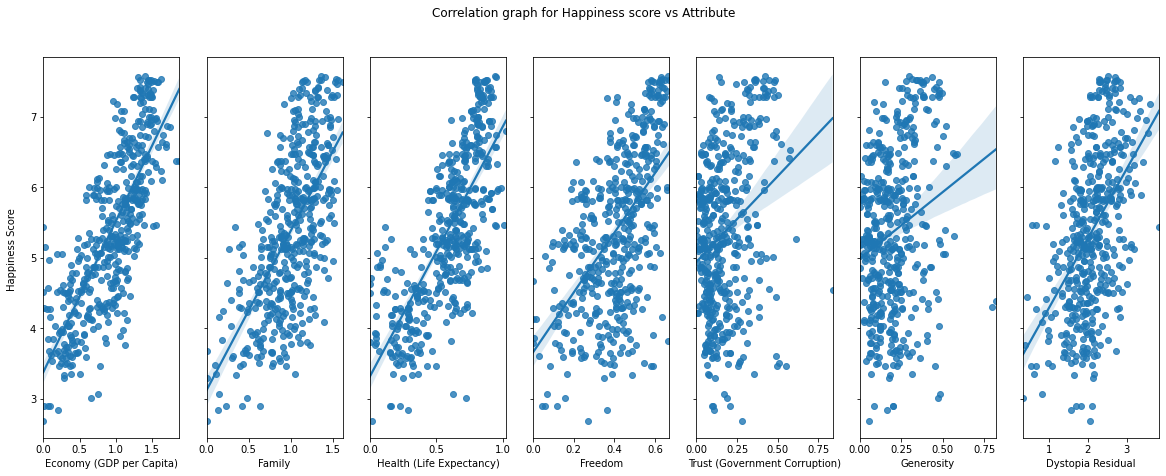

In [0]:
# Plot a regression plot for each attribute vs happiness score
fig, axis = plt.subplots(1,7,figsize = (20,7),sharey=True)
fig.suptitle('Correlation graph for Happiness score vs Attribute')
for i in range(1,8):
    ax_indv = sns.regplot(data = data_attributes, x = attributes[i], y = 'Happiness Score',ax=axis[i-1])
    ax_indv.set(ylabel='')

fig.text(0.1, 0.5, 'Happiness Score', va='center', rotation='vertical')

Summary


- overall, the general trend of all the attributes is a positive correlation with the happiness score
  * ie. the higher the values of the attributes, the higher the happiness score
  * this is shown by all the positive R values in the correlation matrix (first row)
- however, on a closer inspection, the correlation for attributes like family and health are much stronger than attributes like trust and generosity
  * this is shown by the magnitude of R values (~0.7 vs ~0.2)
  * the R^values are almost 10-fold higher for family and health compared to trust and generosity, further supporting this notion (which is also shown by how close the data points are to the regression line in the first 2 attributes compared to the last 2) 
  
  **Explanation**
- these values suggest that health is the most important factor for happiness, followed by family, while attributes like trust and generosity play almost no role in increasing happiness levels
- factors like freedom play an intermediate role contribution to happiness 
